# Boston Airbnb Analysis- Business Requirements

I will be analysing Boston Airbnb data to answer the following questions:
1. What are the zipcodes with higher number of listings?
2. Average list pricing and review rating in these zipcodes? 
3. Are no. of reviews and listing price correlated, what features affect review scores?
4. What features are correlated to price?



In [1]:
# Import necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load and View Data

In [2]:
path_to_data = "/Users/jsanag01/Udacity/boston-airbnb-open-data"

In [3]:
# Load Data

calendar_df = pd.read_csv('{}/calendar.csv'.format(path_to_data))
listings_df = pd.read_csv('{}/listings.csv'.format(path_to_data))
reviews_df = pd.read_csv('{}/reviews.csv'.format(path_to_data))

In [4]:
calendar_df.shape

(1308890, 4)

In [5]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [6]:
listings_df.shape

(3585, 95)

In [7]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
reviews_df.shape

(68275, 6)

In [9]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Clean and prepare data

In [10]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [12]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [13]:
# prints percentage of missing values per column in dataset
def columns_with_missing_vals(data):
    print((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100)

In [14]:
columns_with_missing_vals(calendar_df)

price    50.871578
dtype: float64


In [15]:
columns_with_missing_vals(reviews_df)

comments    0.077627
dtype: float64


In [16]:
columns_with_missing_vals(listings_df)

summary                           3.988842
space                            29.483961
neighborhood_overview            39.470014
notes                            55.090656
transit                          35.983264
access                           41.534170
interaction                      43.347280
house_rules                      33.249651
thumbnail_url                    16.708508
medium_url                       16.708508
xl_picture_url                   16.708508
host_location                     0.306834
host_about                       36.513250
host_response_time               13.138075
host_response_rate               13.138075
host_acceptance_rate             13.138075
host_neighbourhood                9.456067
neighbourhood                    15.146444
neighbourhood_group_cleansed    100.000000
city                              0.055788
zipcode                           1.059972
market                            0.390516
property_type                     0.083682
bathrooms  

In [17]:
# remove columns from listings_df that have 100% missing values

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'], 
                                axis = 1, inplace=True)


In [18]:
#format price and date data

def format_price(data):
    data.price = data.price.str.lstrip('$').str.replace(',', '').astype('float')

def format_date(data):
    data.date = pd.to_datetime(data.date)

In [19]:
format_price(calendar_df)

In [20]:
format_price(listings_df)

In [21]:
format_date(calendar_df)

In [22]:
format_date(reviews_df)

In [23]:
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [24]:
listings_df.host_response_rate = listings_df.host_response_rate.str.rstrip('%').astype('float')

In [25]:
listings_df.host_response_rate = listings_df.host_response_rate*0.01

In [26]:
listings_df.host_acceptance_rate = listings_df.host_acceptance_rate.str.rstrip('%').astype('float')

In [27]:
listings_df.host_acceptance_rate = listings_df.host_acceptance_rate*0.01

In [28]:
listings_df.review_scores_rating = round(listings_df.review_scores_rating*0.1)

In [29]:
#fill nas with 0

listings_df.fillna(0,inplace = True)

In [30]:
listings_df.zipcode = listings_df.zipcode.str[:5]

# Data Analysis - Zipcodes with 100 or more listings

In [31]:
#zipcode count
zipcode_count = listings_df.zipcode.value_counts()

In [32]:
zipcode_count

02116    388
02130    331
02118    247
02215    236
02134    233
02114    231
02127    180
02135    172
02115    169
02128    146
02125    129
02120    115
02113    101
02119    100
02111     99
02129     90
02124     80
02210     75
02108     73
02131     65
02109     51
02122     44
02132     37
02136     29
02121     29
02126     24
02110     13
02145     12
02446      8
02143      7
02138      6
02139      6
02467      5
02445      5
02163      3
02141      3
02142      1
02169      1
02186      1
02472      1
02218      1
Name: zipcode, dtype: int64

In [33]:
listings_df.shape

(3585, 91)

In [34]:
ZC = ['02111','02129','02124','02210','02108','02131','02109','02122','02121','02136','02132','02126','02110','02145','02446','02143','02139','02138','02467','02445','02141','02163','02218','02169','02472','02186','02142']

In [35]:
listings_df.drop(listings_df[listings_df.zipcode.isin(ZC)].index, inplace=True)

In [36]:
listings_df.shape

(2816, 91)

In [37]:
listings_df.zipcode.value_counts()

02116    388
02130    331
02118    247
02215    236
02134    233
02114    231
02127    180
02135    172
02115    169
02128    146
02125    129
02120    115
02113    101
02119    100
Name: zipcode, dtype: int64

# Listing types in these zipcodes

In [38]:
listings_df.groupby(['property_type','room_type','zipcode']).agg({'zipcode':'count','price':'mean','accommodates':'mean','bedrooms':'mean','bathrooms':'mean'}).round(0).rename(columns={'zipcode': 'listing_count'})

listing_count  price  accommodates  \
property_type room_type       zipcode                                       
0             Entire home/apt 02116                1  199.0           2.0   
              Private room    02134                1  115.0           1.0   
Apartment     Entire home/apt 02113               75  200.0           3.0   
                              02114              175  224.0           4.0   
                              02115              104  210.0           3.0   
                              02116              301  239.0           3.0   
                              02118              159  218.0           4.0   
                              02119               25  215.0           5.0   
                              02120               44  209.0           4.0   
                              02125               22  158.0           5.0   
                              02127               66  226.0           4.0   
                              02128               53  152.0           4.0   
                              02130               93  195.0           4.0   
                              02134               74  164.0           4.0   
                              02135               58  155.0           4.0   
                              02215              176  260.0           4.0   
              Private room    02113               11  128.0           2.0   
                              02114               34  155.0           2.0   
                              02115               45  161.0           2.0   
                              02116               32  161.0           2.0   
                              02118               39  142.0           2.0   
                              02119               28   76.0           2.0   
                              02120               36   72.0           2.0   
                              02125               58   73.0           2.0   
                              02127               28  102.0           2.0   
                              02128               49   88.0           2.0   
                              02130               95   78.0           2.0   
                              02134               72   72.0           2.0   
                              02135               55   93.0           2.0   
                              02215               41   95.0           2.0   
...                                              ...    ...           ...   
Loft          Entire home/apt 02134                1  130.0           3.0   
                              02135                1  195.0           4.0   
              Private room    02116                1   50.0           1.0   
                              02118                1   69.0           2.0   
                              02120                2   60.0           2.0   
                              02127                1  150.0           1.0   
              Shared room     02118                1   67.0           1.0   
Other         Private room    02115                1  218.0           2.0   
                              02127                8  135.0           2.0   
              Shared room     02116                1   40.0           1.0   
                              02118                2  500.0           1.0   
                              02135                1  225.0           1.0   
Townhouse     Entire home/apt 02116                7  211.0           3.0   
                              02118                1  575.0           4.0   
                              02127                1  299.0          14.0   
                              02130                2  147.0           2.0   
                              02135                1  250.0           6.0   
              Private room    02113                1  175.0           4.0   
                              02114                1  202.0           1.0   
                              02116

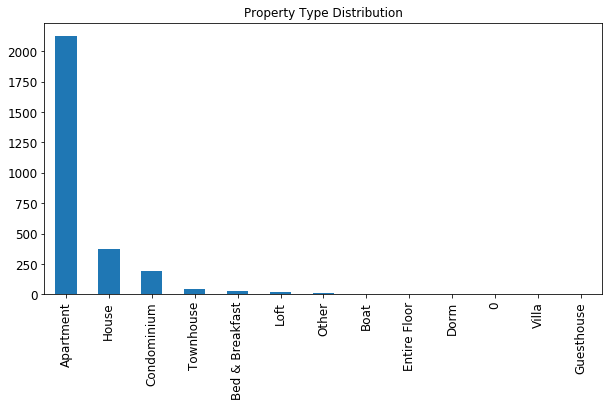

In [39]:
listings_df.property_type.value_counts().plot.bar(figsize=(10, 5), fontsize = 12, title = 'Property Type Distribution');

In [40]:
listings_df.groupby(['property_type']).agg({'price':'mean','zipcode':'count'}).round(0).sort_values(['zipcode'],ascending=False).rename(columns={'zipcode': 'listing_count'})

,price,listing_count
property_type,,
Apartment,178.0,2100
House,139.0,370
Condominium,191.0,187
Townhouse,144.0,43
Bed & Breakfast,129.0,29
Loft,143.0,22
Other,197.0,13
Boat,240.0,5
Entire Floor,136.0,3


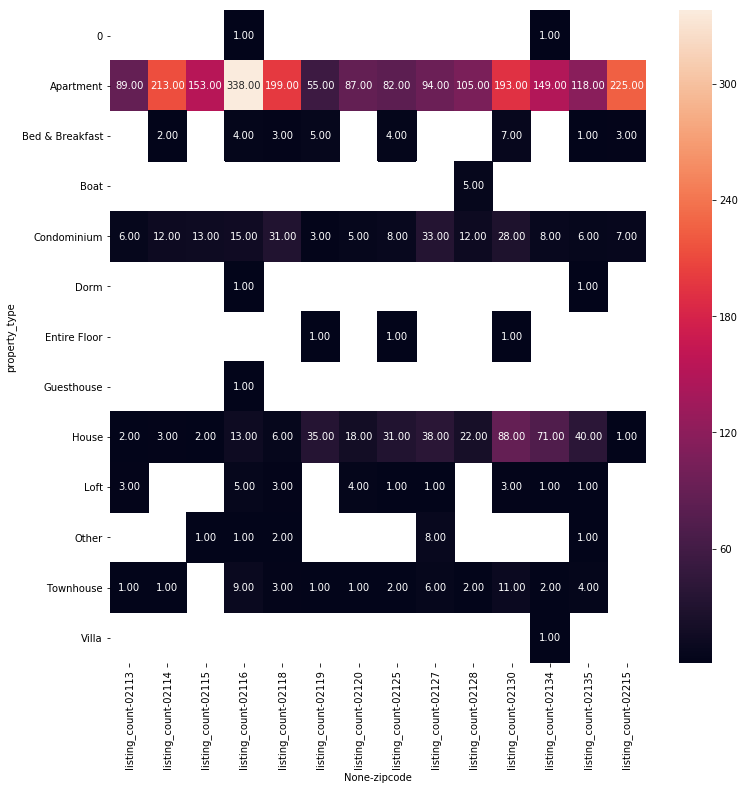

In [41]:
plt.figure(figsize=(12,12));
sns.heatmap(listings_df.groupby(['property_type', 'zipcode']).agg({'zipcode':'count'}).rename(columns={'zipcode': 'listing_count'}).unstack(),annot=True, fmt=".2f");

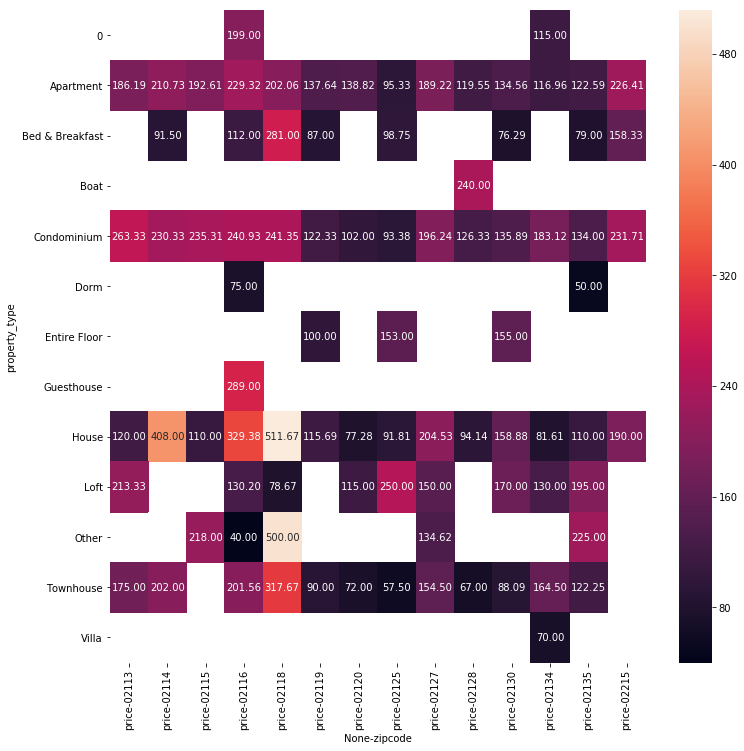

In [42]:
plt.figure(figsize=(12,12));
sns.heatmap(listings_df.groupby(['property_type', 'zipcode']).agg({'price':'mean'}).unstack(),annot=True, fmt=".2f");

Based on the above graphs, looks like apartments are the most common type of listings for all the zipcodes contributing to more than 75% of the overall listings with average pricing of 175. next popular property type is house with average pricing of $139. 

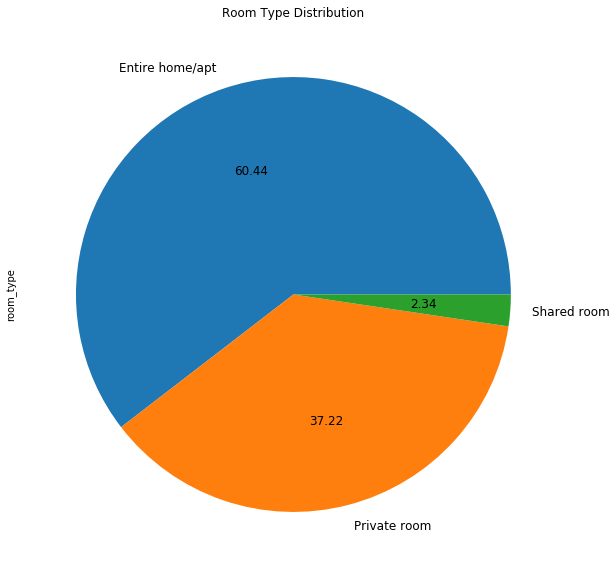

In [43]:
listings_df.room_type.value_counts().plot.pie(figsize=(10, 10), fontsize = 12, autopct = '%.2f', title = 'Room Type Distribution');

In [44]:
listings_df.groupby(['room_type']).agg({'price':'mean','zipcode':'count'}).round(0).sort_values(['zipcode'],ascending=False).rename(columns={'zipcode': 'listing_count'})

,price,listing_count
room_type,,
Entire home/apt,222.0,1688
Private room,97.0,1025
Shared room,97.0,65


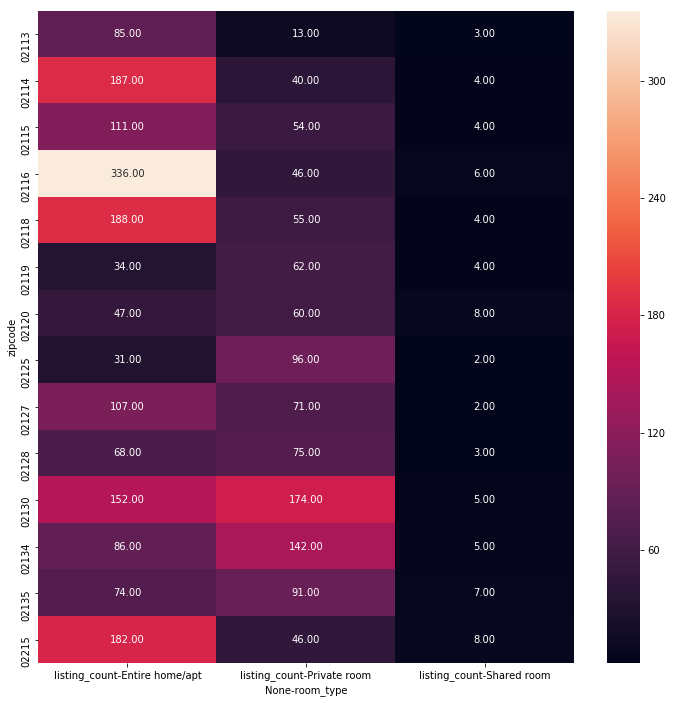

In [45]:
plt.figure(figsize=(12,12));
sns.heatmap(listings_df.groupby(['zipcode', 'room_type']).agg({'zipcode':'count'}).rename(columns={'zipcode': 'listing_count'}).unstack(),annot=True, fmt=".2f");

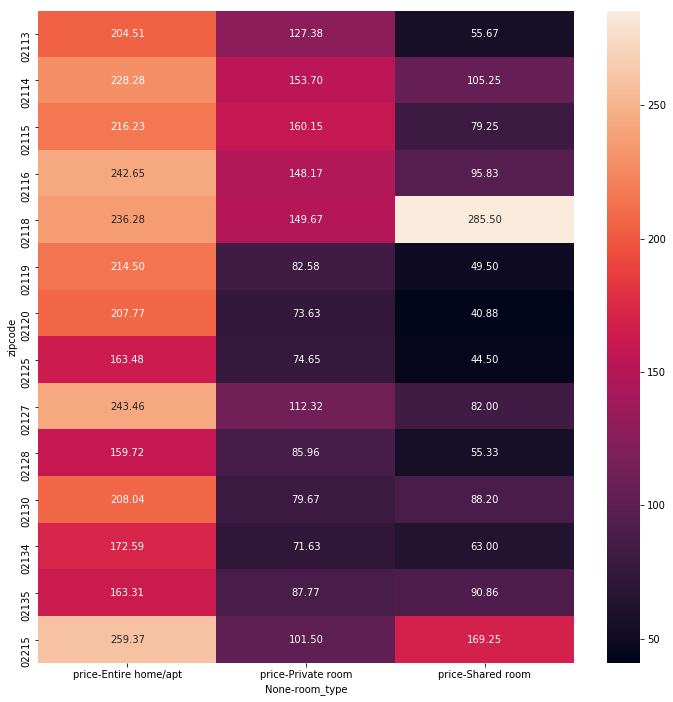

In [46]:
plt.figure(figsize=(12,12));
sns.heatmap(listings_df.groupby(['zipcode', 'room_type']).agg({'price':'mean'}).unstack(),annot=True, fmt=".2f");

Based on the above graphs, looks like most of the times entire apartment is listed for rent, and private room being second popular, and very few listings for shared room. Also, the average pricing is more than double for entire apartment compared to private or shared room.  

# Reviews and Pricing

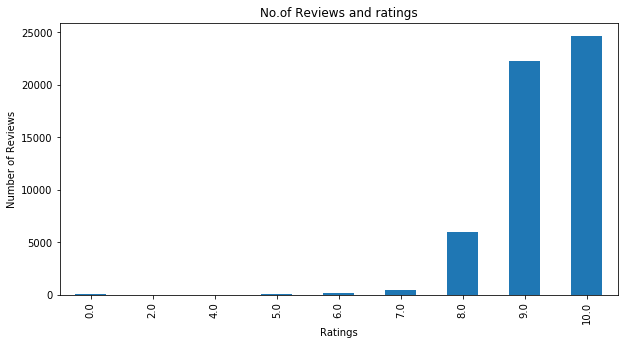

In [47]:
totalreviews_per_rating = listings_df.groupby('review_scores_rating').number_of_reviews.sum()

plt.figure(figsize=(10,5));
totalreviews_per_rating.plot(kind='bar');
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('No.of Reviews and ratings');

Based on the above graph it looks like most of the reviews are positive with very high ratings (9 or 10). High rating scores and number of listings indicate that these zipcodes are popular for renting in Boston. 

Text(0, 0.5, 'Number of reviews')

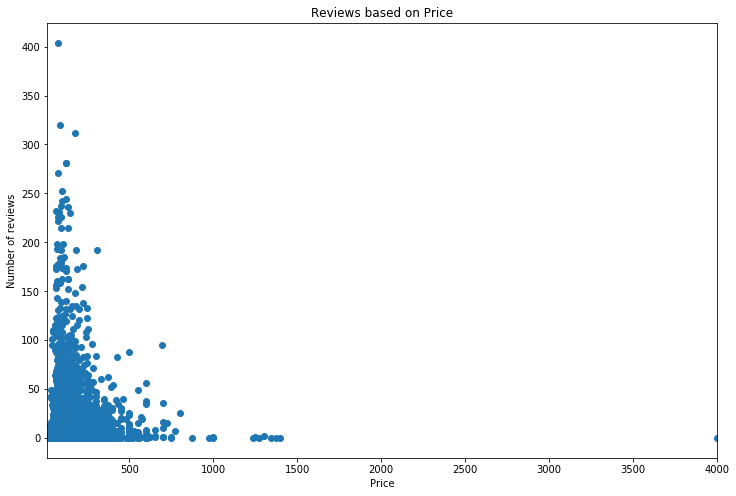

In [48]:
price_review = listings_df[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("Price")
plt.ylabel("Number of reviews")

Since most of the ratings were positive, I wanted to see if there was any correlation between price and number of reviews. Based on the above graph it appears that listings with less than $500, seems to have more reviews and the number of reviews decrease as teh price incraeses. Very few people might be renting properties that cost more than 500, which might be contributing to the decrease in the reviews. 

# Reviews and pricing by zipcode

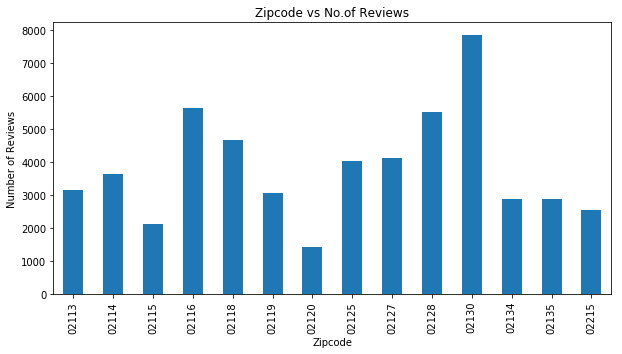

In [49]:
totalreviews_per_zipcode = listings_df.groupby('zipcode').number_of_reviews.sum()

plt.figure(figsize=(10,5));
totalreviews_per_zipcode.plot(kind='bar');
plt.xlabel('Zipcode')
plt.ylabel('Number of Reviews')
plt.title('Zipcode vs No.of Reviews');

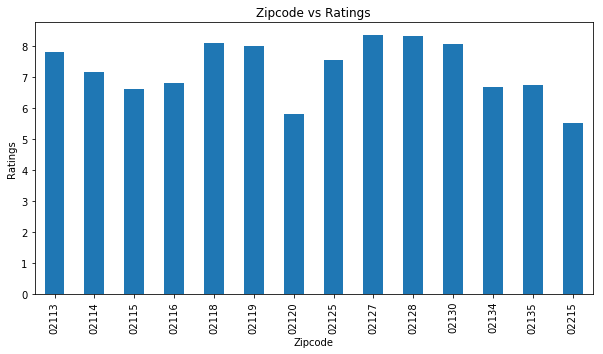

In [50]:
ratings_per_zipcode = listings_df.groupby('zipcode').review_scores_rating.mean()

plt.figure(figsize=(10,5));
ratings_per_zipcode.plot(kind='bar');
plt.xlabel('Zipcode')
plt.ylabel('Ratings')
plt.title('Zipcode vs Ratings');

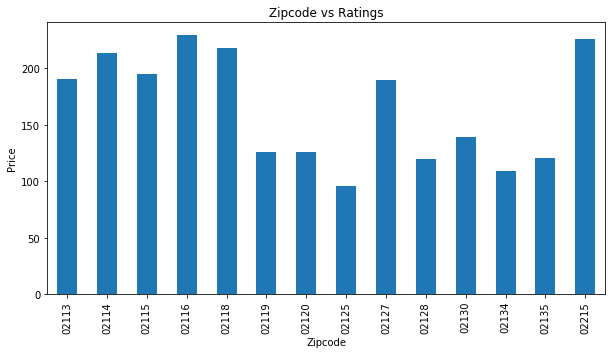

In [51]:
price_per_zipcode = listings_df.groupby('zipcode').price.mean()

plt.figure(figsize=(10,5));
price_per_zipcode.plot(kind='bar');
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('Zipcode vs Ratings');

Based on the above graphs looks like most of the zipcodes have very good ratings from the customers, and zipcode 02130 seems to be the most popular due to its highest number of reviews, high rating score, and lower prices. 

# Reviews and pricing by property type

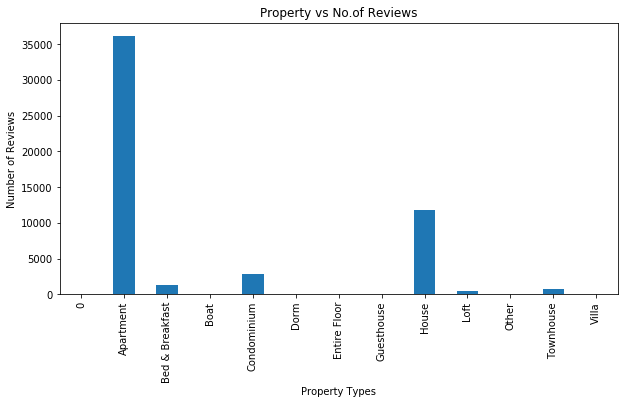

In [52]:
totalreviews_per_property_type = listings_df.groupby('property_type').number_of_reviews.sum()

plt.figure(figsize=(10,5));
totalreviews_per_property_type.plot(kind='bar');
plt.xlabel('Property Types')
plt.ylabel('Number of Reviews')
plt.title('Property vs No.of Reviews');

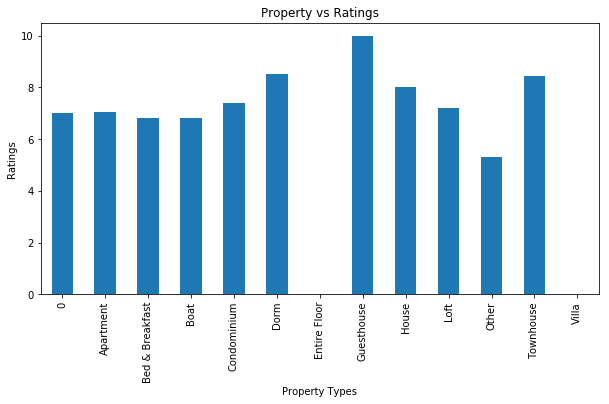

In [53]:
ratings_per_property_type = listings_df.groupby('property_type').review_scores_rating.mean()

plt.figure(figsize=(10,5));
ratings_per_property_type.plot(kind='bar');
plt.xlabel('Property Types')
plt.ylabel('Ratings')
plt.title('Property vs Ratings');

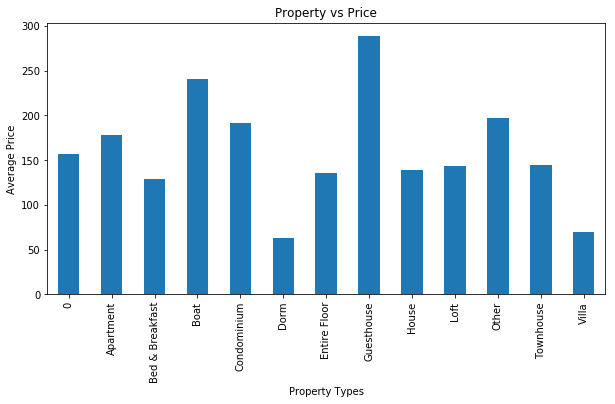

In [54]:
price_per_property_type = listings_df.groupby('property_type').price.mean()

plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Price');

Based on the above graphs, looks like apartments are most commonly rented and then house. Although the guest house has very good rating, not many people seem to rent it due to its high cost. Apartments and house seem to have decent ratings and are reasonably priced. Depending on what the individual is looking for, even bed and breakfast seems to be a fine option due to its price and ratings. 

# Reviews and pricing by room type

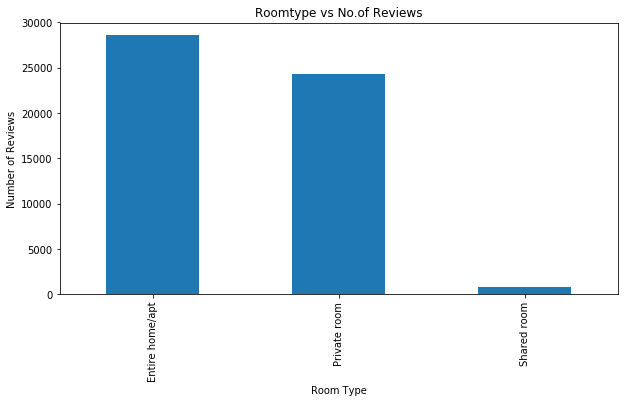

In [55]:
totalreviews_per_room_type = listings_df.groupby('room_type').number_of_reviews.sum()

plt.figure(figsize=(10,5));
totalreviews_per_room_type.plot(kind='bar');
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.title('Roomtype vs No.of Reviews');

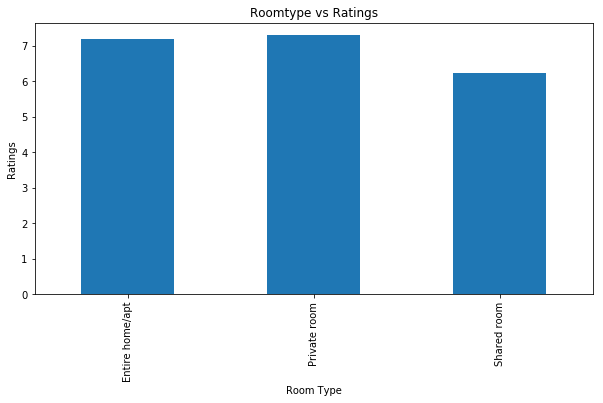

In [56]:
ratings_per_room_type = listings_df.groupby('room_type').review_scores_rating.mean()

plt.figure(figsize=(10,5));
ratings_per_room_type.plot(kind='bar');
plt.xlabel('Room Type')
plt.ylabel('Ratings')
plt.title('Roomtype vs Ratings');

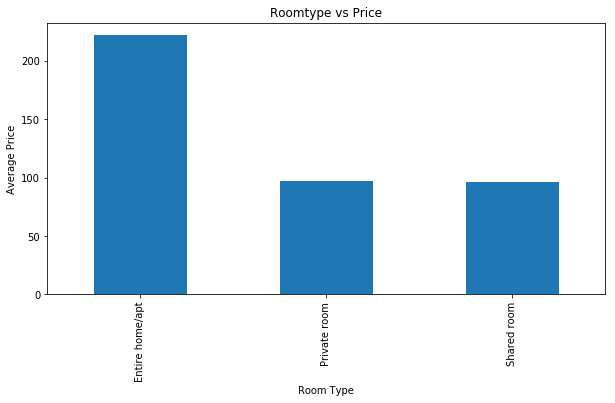

In [57]:
price_per_room_type = listings_df.groupby('room_type').price.mean()

plt.figure(figsize=(10,5));
price_per_room_type.plot(kind='bar');
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Roomtype vs Price');

Based on the above graphs, all room types have similar ratings, however the orice for entire apartment is more tahn twice the price for private/shared room. However, entire room/aprtment and private room seem to be most commonly rented and reviewed by customers. 

# Correlation between ratings and pricing, and other features in the dataset

In [58]:
listings_df.replace({'within an hour': 0,
                         'within a few hours': 1,
                         'within a day': 2,
                         'a few days or more': 3}, inplace=True)

listings_df.replace({'Entire home/apt': 2, 
                       'Shared room':0, 
                       'Private room':1}, inplace=True)

listings_df.replace({'Apartment':6,
 'Bed & Breakfast':4,
 'Boat':5,
 'Condominium':7,
 'Dorm':3,
 'Entire Floor':2,
 'Guesthouse':10,
 'House':9,
 'Loft':1,
 'Other':0,
 'Townhouse':8,
 'Villa':11}, inplace=True)

listings_df.replace({'Allston':0,
 'Back Bay':1,
 'Bay Village':2,
 'Beacon Hill':3,
 'Brighton':4,
 'Charlestown':5,
 'Chinatown':6,
 'Dorchester':7,
 'Downtown':8,
 'East Boston':9,
 'Fenway':10,
 'Hyde Park':11,
 'Jamaica Plain':12,
 'Leather District':13,
 'Longwood Medical Area':14,
 'Mattapan':15,
 'Mission Hill':16,
 'North End':17,
 'Roslindale':18,
 'Roxbury':19,
 'South Boston':20,
 'South Boston Waterfront':21,
 'South End':22,
 'West End':23,
 'West Roxbury':24},inplace=True)

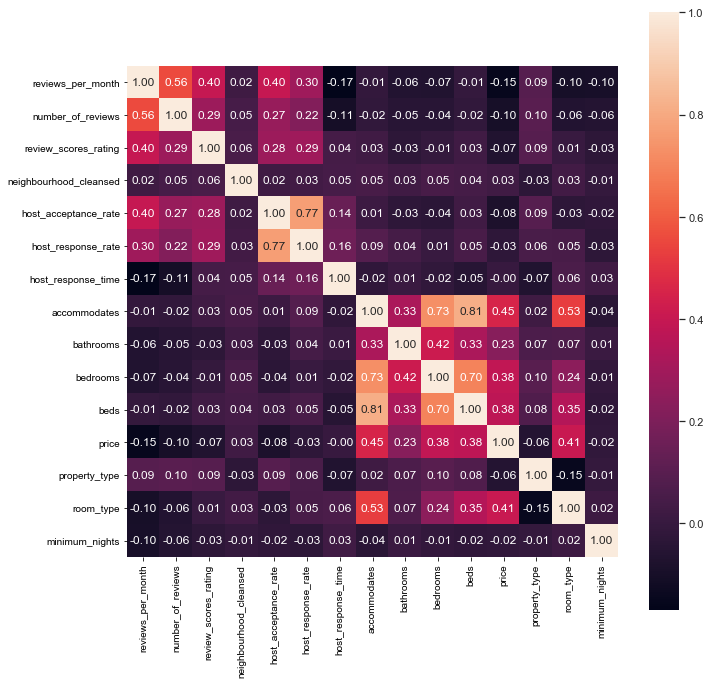

In [59]:
cols = ['reviews_per_month','number_of_reviews','review_scores_rating','neighbourhood_cleansed','host_acceptance_rate','host_response_rate','host_response_time','accommodates',
       'bathrooms','bedrooms','beds','price','property_type',
       'room_type','minimum_nights']

corrs = np.corrcoef(listings_df[cols].values.T)
fig, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

Based on the above graph, four main features that are positively correlated to price are no.of people that can be accommodated, room type, no. of bedrooms, and no.of bathrooms. price and reviews are negatively correlated, menaing higher the price, lower the number of reviews. Features that are positively correalted with reviews are host acceptacnce and response rate, no.of reviwes for the listing. Property Type, neighbourhood have very little influence on the ratings. 

# Conclusion

- From the above analysis, there are 13 zipcodes in Boston that have 100 or more lsitings. We found that the apartments are most commonly listed, and most of the times either entire apartment or a private room is listed. The listig price is mainly influenced by the number of people it accommodates, no. of bedroooms and bathrooms, and room type. 
- Most of these zipcodes have very good rating, and  review scores seem to be positively dependent on host accepatnce and response rates. However as the price increases, the number of reviews have gone down indicating, very few people renting out expensive properties. 
- Zipcode 02130 which includes neighbourhoods: Jamaica Plain, Mission Hill, West Roxbury seems to be most popular among customers based on its rating, pricing, and total number of reviews.
- Houses also seem to be popular among properties that are listed, and have good ratings. Deepnding on individual needs, even bed and breakfast seems to be a decent option. 
